In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

# New Section

In [2]:
 # !unzip drive/MyDrive/files/Tomato123.zip

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 8
CHANNELS = 3
EPOCHS = 10

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('Tomato', image_size=(IMAGE_SIZE,IMAGE_SIZE),
                                                             shuffle=True,batch_size=BATCH_SIZE,seed=123)

Found 4500 files belonging to 3 classes.


In [4]:
classes = dataset.class_names
classes

['Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

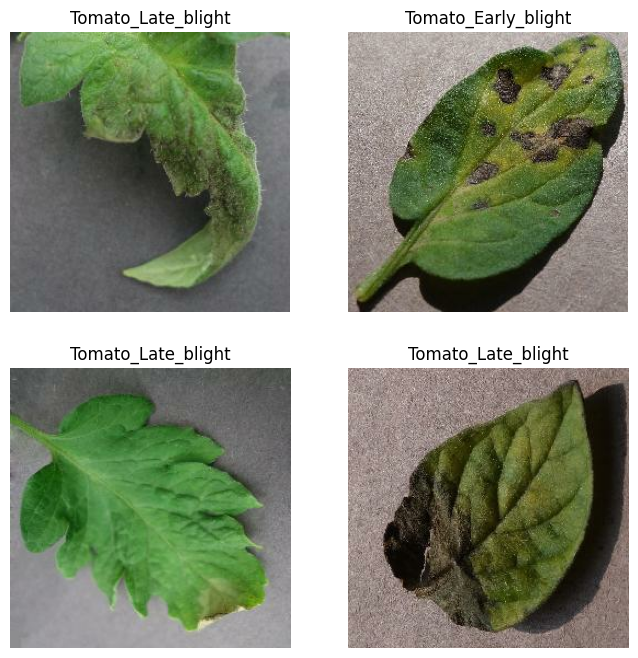

In [10]:
plt.figure(figsize=(8,8))
for image,label in dataset.take(1):
    for i in range(4):
        plt.subplot(2,2,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')
        plt.title(classes[label[i]])

In [11]:
def get_data(ds,train_size = 0.8, val_size = 0.1, shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size)
    train_size = int(ds_size*train_size)
    val_size = int(ds_size*val_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [12]:
int(len(dataset)*0.8)

450

In [13]:
train_ds, val_ds,test_ds = get_data(dataset)

In [14]:
len(train_ds),len(val_ds),len(test_ds)

(450, 56, 57)

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [16]:
rescale_resize = keras.Sequential([
    keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    keras.layers.experimental.preprocessing.Rescaling(1.0/256)
])

In [17]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = keras.models.Sequential([
    rescale_resize,
    data_augmentation,
    keras.layers.Conv2D(32,(3,3),input_shape = input_shape, activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3), activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(3,activation='softmax')
])

In [19]:
model.build(input_shape=input_shape)

In [20]:
model.compile(optimizer = 'adam',
             loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (8, 256, 256, 3)          0         
                                                                 
 sequential_1 (Sequential)   (8, 256, 256, 3)          0         
                                                                 
 conv2d (Conv2D)             (8, 254, 254, 32)         896       
                                                                 
 max_pooling2d (MaxPooling2  (8, 127, 127, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (8, 125, 125, 64)         18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (8, 62, 62, 64)           0         
 g2D)                                                 

In [23]:
history = model.fit(train_ds,validation_data=val_ds,batch_size=BATCH_SIZE,verbose=1, epochs = EPOCHS)

Epoch 1/10
450/450 [==============================] - 39s 35ms/step - loss: 0.9238 - accuracy: 0.5514 - val_loss: 0.5097 - val_accuracy: 0.7567
Epoch 2/10
450/450 [==============================] - 9s 19ms/step - loss: 0.5768 - accuracy: 0.7450 - val_loss: 0.4908 - val_accuracy: 0.7879
Epoch 3/10
450/450 [==============================] - 9s 20ms/step - loss: 0.4713 - accuracy: 0.7953 - val_loss: 0.3858 - val_accuracy: 0.8192
Epoch 4/10
450/450 [==============================] - 9s 21ms/step - loss: 0.4693 - accuracy: 0.7998 - val_loss: 0.4175 - val_accuracy: 0.7812
Epoch 5/10
450/450 [==============================] - 9s 20ms/step - loss: 0.4038 - accuracy: 0.8329 - val_loss: 0.3454 - val_accuracy: 0.8504
Epoch 6/10
450/450 [==============================] - 9s 21ms/step - loss: 0.3766 - accuracy: 0.8482 - val_loss: 0.3035 - val_accuracy: 0.8929
Epoch 7/10
450/450 [==============================] - 9s 21ms/step - loss: 0.3841 - accuracy: 0.8496 - val_loss: 0.2728 - val_accuracy: 0.890

In [24]:
score = model.evaluate(test_ds)

57/57 [==============================] - 3s 9ms/step - loss: 0.3919 - accuracy: 0.8385


In [25]:
score

[0.3918989598751068, 0.8384955525398254]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_accuracy']

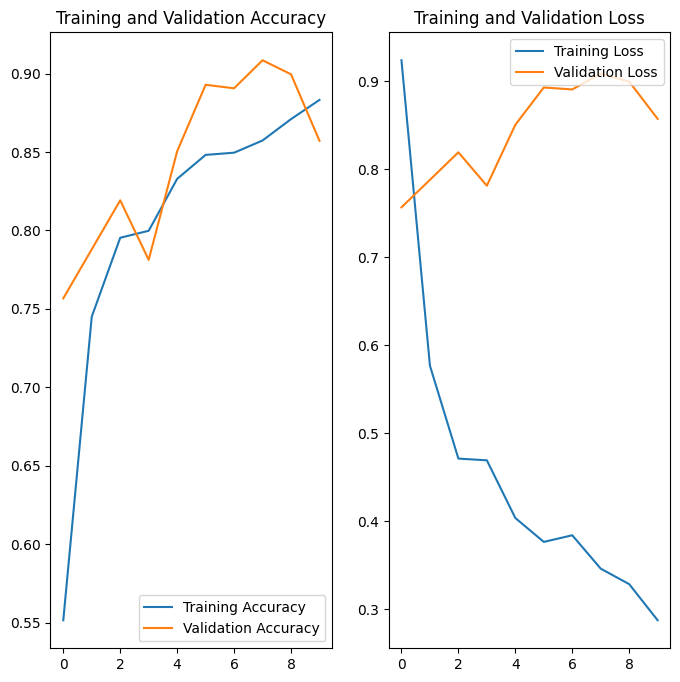

In [27]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 26ms/step


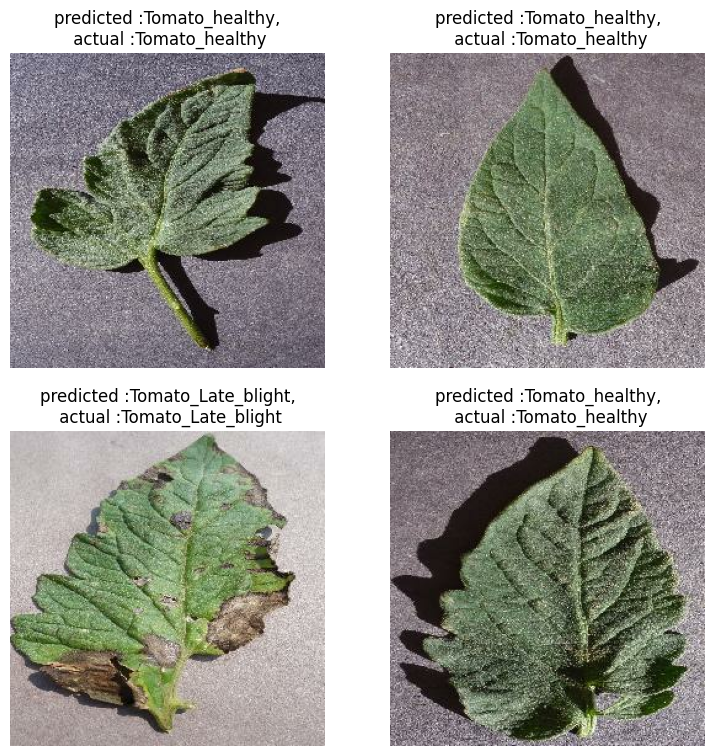

In [32]:
plt.figure(figsize=(9,9))
for image,label in dataset.take(1):
  for i in range(4):
      plt.subplot(2,2,i+1)
      plt.imshow(image[i].numpy().astype('uint8'))
      plt.axis('off')
      predi = model.predict(image)[i]
      plt.title(f"predicted :{classes[np.argmax(predi)]},\n actual :{classes[label[i]]}")

In [ ]:
model.save("drive/MyDrive/models/tomato.h5")